In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

print("Path to dataset files:", path)

C:\Users\Danya\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Danya\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13


In [3]:
df = pd.read_csv("US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population,Month
0,A-733,Source2,2,2016-06-21 10:16:26,37.250729,-121.910713,NaN,NaN,0.0,Right hand shoulder blocked due to accident on...,...,False,False,False,False,Day,Day,Day,Day,0,6
1,A-735,Source2,3,2016-06-21 10:17:17,37.328312,-121.871811,NaN,NaN,0.0,#1 lane blocked due to accident on I-280 South...,...,False,False,False,False,Day,Day,Day,Day,0,6
2,A-744,Source2,2,2016-06-21 11:16:14,38.481682,-121.408768,NaN,NaN,0.0,#1 lane blocked due to accident on Power Inn R...,...,False,False,False,False,Day,Day,Day,Day,0,6
3,A-745,Source2,3,2016-06-21 11:16:55,38.682713,-121.336288,NaN,NaN,0.0,Multi-vehicle accident on I-80 Westbound at Ex...,...,False,False,False,False,Day,Day,Day,Day,0,6
4,A-749,Source2,3,2016-06-21 11:30:58,37.382370,-121.904358,NaN,NaN,0.0,#2 lane blocked due to accident on I-880 South...,...,False,False,False,False,Day,Day,Day,Day,0,6


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'population', 'Month'],
      dtype='object')

In [5]:
a = df.City.value_counts()

In [6]:
a = a.head(30)
print(a.to_string())

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
San Jose          34536
Indianapolis      33219
Chicago           32035
Tampa             31193
Denver            30557


In [7]:
df = df[df['City'].isin(a.index)]
df[df.City == 'Columbia']

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population,Month
42244,A-168962,Source2,2,2016-12-30 15:37:20,38.429672,-90.180244,NaN,NaN,0.010,Right lane closed and right hand shoulder clos...,...,False,False,False,False,Day,Day,Day,Day,0,12
42375,A-171099,Source2,3,2016-11-06 06:21:23,38.486439,-90.274841,NaN,NaN,0.010,Accident on I-255 Southbound at Mississippi Ri...,...,False,False,False,False,Night,Day,Day,Day,0,11
42955,A-202706,Source2,2,2016-10-26 07:15:38,41.719288,-72.279236,NaN,NaN,0.010,Accident on US-6 at CT-66 Middletown Rd.,...,False,False,True,False,Day,Day,Day,Day,0,10
42962,A-228864,Source2,2,2016-12-02 06:00:09,39.202053,-76.859383,NaN,NaN,0.010,Accident on US-29 Columbia Pike Southbound at ...,...,False,False,False,False,Night,Night,Night,Day,0,12
42963,A-229859,Source2,2,2016-12-07 10:12:01,40.033890,-76.499596,NaN,NaN,0.010,Accident on PA-462 5th St at Locust St.,...,False,False,True,False,Day,Day,Day,Day,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076600,A-7774334,Source1,3,2019-08-16 13:57:23,34.038070,-81.106360,34.03537,-81.11586,0.575,At I-26/US-76/Exit 64 - Accident. Blocked ahead.,...,False,False,False,False,Day,Day,Day,Day,0,8
2076602,A-7774345,Source1,3,2019-08-16 17:18:27,34.038070,-81.106360,34.03537,-81.11586,0.575,At I-26/US-76/Exit 64 - Accident. Right lane b...,...,False,False,False,False,Day,Day,Day,Day,0,8
2076676,A-7774751,Source1,2,2019-08-17 13:46:39,34.042070,-81.087520,34.03853,-81.10024,0.768,At US-176/Broad River Road/Exit 65 - Accident....,...,False,False,False,False,Day,Day,Day,Day,0,8
2076978,A-7776373,Source1,2,2019-08-21 14:11:28,34.068710,-80.917760,34.06931,-80.93030,0.719,At I-77/Exit 76A - Accident. Left lane blocked.,...,False,False,False,False,Day,Day,Day,Day,0,8


In [8]:
df.shape

(2077228, 47)

In [9]:
df.City.value_counts()

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
San Jose          34536
Indianapolis      33219
Chicago           32035
Tampa             31193
Denver            30557
Name: count, dtype: int64

In [10]:
df['population'] = 0
df

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,population,Month
0,A-733,Source2,2,2016-06-21 10:16:26,37.250729,-121.910713,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,...,False,False,False,False,Day,Day,Day,Day,0,6
1,A-735,Source2,3,2016-06-21 10:17:17,37.328312,-121.871811,NaN,NaN,0.000,#1 lane blocked due to accident on I-280 South...,...,False,False,False,False,Day,Day,Day,Day,0,6
2,A-744,Source2,2,2016-06-21 11:16:14,38.481682,-121.408768,NaN,NaN,0.000,#1 lane blocked due to accident on Power Inn R...,...,False,False,False,False,Day,Day,Day,Day,0,6
3,A-745,Source2,3,2016-06-21 11:16:55,38.682713,-121.336288,NaN,NaN,0.000,Multi-vehicle accident on I-80 Westbound at Ex...,...,False,False,False,False,Day,Day,Day,Day,0,6
4,A-749,Source2,3,2016-06-21 11:30:58,37.382370,-121.904358,NaN,NaN,0.000,#2 lane blocked due to accident on I-880 South...,...,False,False,False,False,Day,Day,Day,Day,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077223,A-7777732,Source1,2,2019-08-23 13:42:50,34.070610,-118.263910,34.06974,-118.26155,0.148,At Glendale Blvd/Union Ave - Accident.,...,False,False,False,False,Day,Day,Day,Day,0,8
2077224,A-7777742,Source1,2,2019-08-23 15:33:46,32.773510,-117.161180,32.76895,-117.16210,0.320,At Friars Rd - Accident. Center lane blocked.,...,False,False,False,False,Day,Day,Day,Day,0,8
2077225,A-7777744,Source1,2,2019-08-23 15:45:43,34.043650,-118.443730,34.04934,-118.44842,0.476,At CA-2/Santa Monica Blvd/Exit 55A - Accident.,...,False,False,False,False,Day,Day,Day,Day,0,8
2077226,A-7777745,Source1,2,2019-08-23 16:43:59,32.729250,-117.106810,32.72216,-117.10269,0.545,At Home Ave/Exit 13B - Accident.,...,False,False,False,False,Day,Day,Day,Day,0,8


In [11]:
print(a.to_string())

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
San Jose          34536
Indianapolis      33219
Chicago           32035
Tampa             31193
Denver            30557


In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['Month'] = df['Start_Time'].dt.month

In [13]:
df.Month.value_counts()

Month
12    219189
11    203429
1     198971
10    186413
9     179117
2     171476
4     166269
8     165688
5     154327
3     150711
6     147781
7     133857
Name: count, dtype: int64

In [14]:
df.to_csv('US_Accidents_March23.csv', index=False)

In [15]:
df.Start_Time

0         2016-06-21 10:16:26
1         2016-06-21 10:17:17
2         2016-06-21 11:16:14
3         2016-06-21 11:16:55
4         2016-06-21 11:30:58
                  ...        
2077223   2019-08-23 13:42:50
2077224   2019-08-23 15:33:46
2077225   2019-08-23 15:45:43
2077226   2019-08-23 16:43:59
2077227   2019-08-23 19:11:30
Name: Start_Time, Length: 2077228, dtype: datetime64[ns]

In [16]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

df['Hour'] = df['Start_Time'].dt.hour

def get_daytime(hour):
    if 6 <= hour <= 11: #morning
        return 1
    elif 12 <= hour <= 17: #day
        return 2
    else:
        return 3  #evening
df['daytime'] = df['Hour'].apply(get_daytime)


In [17]:
df.daytime

0          1
1          1
2          1
3          1
4          1
          ..
2077223    2
2077224    2
2077225    2
2077226    2
2077227    3
Name: daytime, Length: 2077228, dtype: int64

In [18]:
df = df.drop(columns=['Hour', 'Start_Time'])

In [19]:
df = df.drop(columns=['population', 'Country', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
                      'Nautical_Twilight', 'Sunrise_Sunset'], axis=1)

In [20]:
df

,ID,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Astronomical_Twilight,Month,daytime
0,A-733,Source2,2,37.250729,-121.910713,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,...,False,False,False,False,False,False,Day,Day,6,1
1,A-735,Source2,3,37.328312,-121.871811,NaN,NaN,0.000,#1 lane blocked due to accident on I-280 South...,I-280 S,...,False,False,False,False,False,False,Day,Day,6,1
2,A-744,Source2,2,38.481682,-121.408768,NaN,NaN,0.000,#1 lane blocked due to accident on Power Inn R...,Gerber Rd,...,False,False,False,False,False,False,Day,Day,6,1
3,A-745,Source2,3,38.682713,-121.336288,NaN,NaN,0.000,Multi-vehicle accident on I-80 Westbound at Ex...,I-80 E,...,False,False,False,False,False,False,Day,Day,6,1
4,A-749,Source2,3,37.382370,-121.904358,NaN,NaN,0.000,#2 lane blocked due to accident on I-880 South...,E Brokaw Rd,...,False,False,False,False,False,False,Day,Day,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077223,A-7777732,Source1,2,34.070610,-118.263910,34.06974,-118.26155,0.148,At Glendale Blvd/Union Ave - Accident.,Hollywood Fwy S,...,False,False,False,False,False,False,Day,Day,8,2
2077224,A-7777742,Source1,2,32.773510,-117.161180,32.76895,-117.16210,0.320,At Friars Rd - Accident. Center lane blocked.,CA-163 S,...,False,False,False,False,False,False,Day,Day,8,2
2077225,A-7777744,Source1,2,34.043650,-118.443730,34.04934,-118.44842,0.476,At CA-2/Santa Monica Blvd/Exit 55A - Accident.,I-405 N,...,False,False,False,False,False,False,Day,Day,8,2
2077226,A-7777745,Source1,2,32.729250,-117.106810,32.72216,-117.10269,0.545,At Home Ave/Exit 13B - Accident.,I-805 S,...,False,False,False,False,False,False,Day,Day,8,2


In [29]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight',
       'Astronomical_Twilight', 'Month', 'daytime'],
      dtype='object')

In [27]:
df = df.drop(columns=['Source'])

In [30]:
df = df.drop(columns=['End_Lat', 'End_Lng', 'Description', 'Street'])

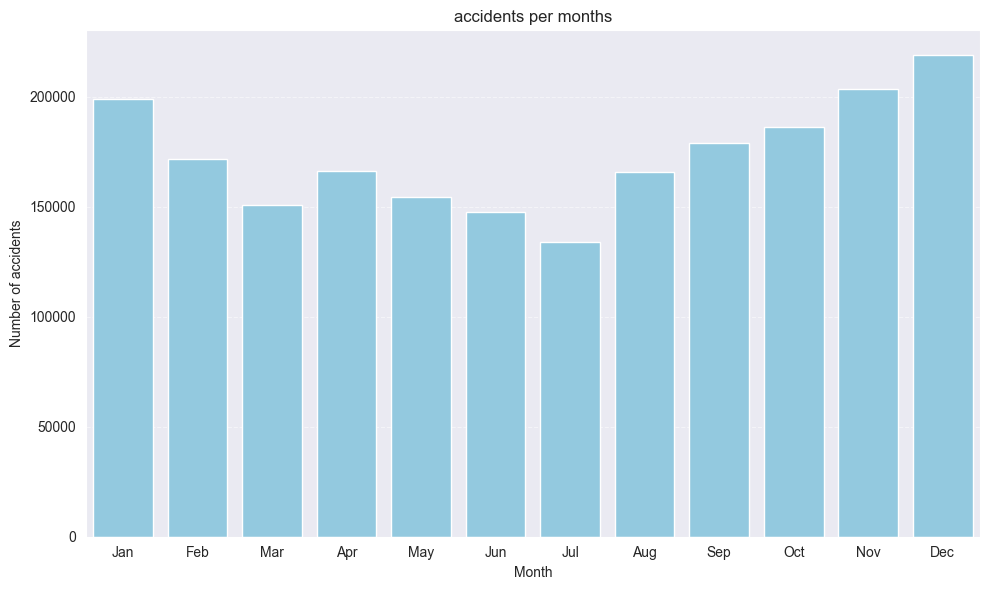

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', color='skyblue')

plt.title('accidents per months')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

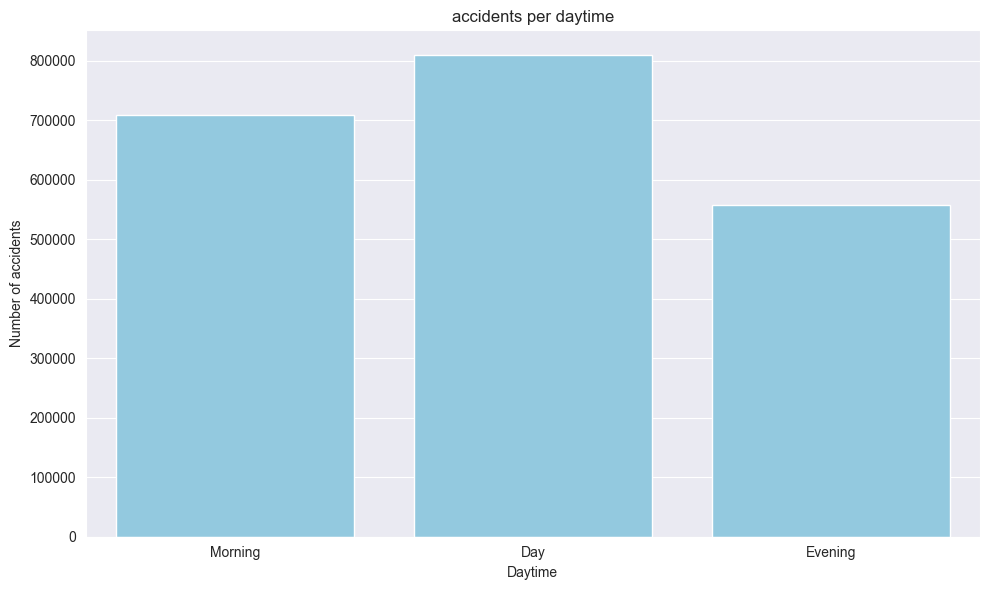

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='daytime', color='skyblue')
plt.title('accidents per daytime')
plt.xlabel('Daytime')
plt.ylabel('Number of accidents')
plt.xticks(ticks=range(3), labels=["Morning", "Day", "Evening"])
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'San Jose'